<a href="https://colab.research.google.com/github/lucaspinheiro27/Python_statistics/blob/main/Jupyter_notebooks/jovemaprendiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://www.salario.com.br/tabela-salarial/aprendiz/

# Sampling distribution

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [2]:
df = pd.read_csv('/content/jovemaprendiz(Planilha1).csv', encoding='latin-1', sep=";")

In [3]:
df = df.sample(frac=1, random_state=42)
df = df.reset_index(drop=True)
df = df['Piso']
df = df.str.replace('.', '')
df = df.str.replace(',', '')
df = df.astype(float)
df

,Piso
0,143786.0
1,147516.0
2,142147.0
3,134825.0
4,138766.0
...,...
494,142366.0
495,143786.0
496,134985.0
497,143274.0


In [4]:
sample_data = pd.DataFrame({
    'Piso': df.sample(125),
    'type': 'Data',
})

In [5]:
sample_mean_05 = pd.DataFrame({
    'Piso': [df.sample(5).mean() for _ in range(125)],
    'type': 'Mean of 5',
})

In [6]:
sample_mean_20 = pd.DataFrame({
    'Piso': [df.sample(20).mean() for _ in range(125)],
    'type': 'Mean of 20',
})

In [7]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

In [8]:
results

,Piso,type
49,143786.00,Data
18,138741.00,Data
27,138211.00,Data
177,135870.00,Data
444,134520.00,Data
...,...,...
120,141152.55,Mean of 20
121,142389.00,Mean of 20
122,140687.15,Mean of 20
123,142752.10,Mean of 20


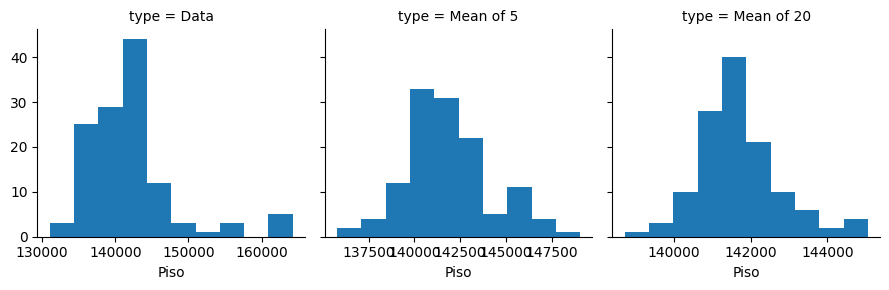

In [9]:
g = sns.FacetGrid(results, col="type", col_wrap=3, sharex=False)
g.map(plt.hist, "Piso")
plt.show()

* Standard Error formula:
$$
SE = \frac{s}{\sqrt{n}}
$$

# The Bootstrap

* the bootstrap basically darw additional damples, with replacements from sample itself and recalculate the statistics or model for each resample. It does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.
* It replicates the original sample millions of times so that you have a hyphotical population that embodis all the knowledge from your original sample.It can be used to experiment with different values for n to see how the sample distribution is affected.

Draw a sample value, record it, and then replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 R times.
5. Use the R results to:

a.Calculate their standard deviation (this estimates sample mean standard
error).
b. Produce a histogram or boxplot.
c. Find a confidence interval.

In [20]:
results = []
for nrepeat in range(125):
    sample = resample(df)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df.median()}')
print(f'bias: {results.mean() - df.median()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original: 141588.0
bias: 82.48000000001048
std.error: 432.92084875912656
